# Cybernetic Multiarmed Bandits

## Bernoulli case

In [9]:
#Dependencies
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import pickle

#Arms
from SMPyBandits.Arms import Bernoulli, Gaussian, Constant
from mabarms import ExtendedBernoulli

#Policies
from SMPyBandits.Policies import Uniform, EmpiricalMeans, UCBalpha, UCB, UCBV, klUCB, BayesUCB, Thompson, SoftMix
from mabalgs import SafeEpsilonGreedy, SafeUCB, SafeUCBalpha, ClassicEpsilonGreedy, ClassicEpsilonDecreasing, ClassicOptimisticGreedy, SafeKLUCB, GamblerBernoulliUCB

#Sim
from mabsim import mabs
from mabplot import mabplt

## Setting (10-Bernoulli-Arms)

In [10]:
plt.rcParams['figure.figsize'] = (12, 8)


# BERNOULLI ARMS :

means = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.55])
#means = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.55, 0.6])
#means = np.concatenate((np.repeat(0.1, 15), np.repeat(0.7, 5), [0.9]))
#means = np.concatenate((np.repeat(0.1, 30), np.repeat(0.6, 5), [0.8]))

maxr = +1.0
minr = -1.0
ampl = maxr - minr

#arms objects
A = [ExtendedBernoulli(m, maxr=maxr, minr=minr) for m in means]

#number of arms
k = len(means)

In [11]:
#initial budget
b_0 = 10.0
b_s = 5.0

#algorithms
G = [
     SafeEpsilonGreedy(k, epsilon=0.1, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     ClassicEpsilonGreedy(k, epsilon=0.1, lower=minr, amplitude=ampl), 
     SafeKLUCB(k, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     klUCB(k, lower=minr, amplitude=ampl),
     SafeUCB(k, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     UCB(k, lower=minr, amplitude=ampl),
     BayesUCB(k, lower=minr, amplitude=ampl),
     GamblerBernoulliUCB(k, inibudget=b_0, lower=minr, amplitude=ampl),
     #SoftMix(k, lower=minr, amplitude=ampl), 
     #EmpiricalMeans(k, lower=minr, amplitude=ampl),
     ###UCBalpha(k, alpha=4.0*ampl, lower=minr, amplitude=ampl), 
     ###UCBalpha(k, alpha=0.5*ampl),
     #UCBV(k, lower=minr, amplitude=ampl),
     ##Thompson(k), 
    ]

#window average parameter (for graphics)
win = None #tau//10

## First Simulation

 - Several Repetitions 
 - Short Horizon

In [12]:
#time-horizon
tau = 100 

#repetitions
n = 200

M = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M.run(tqdm_leave=True)

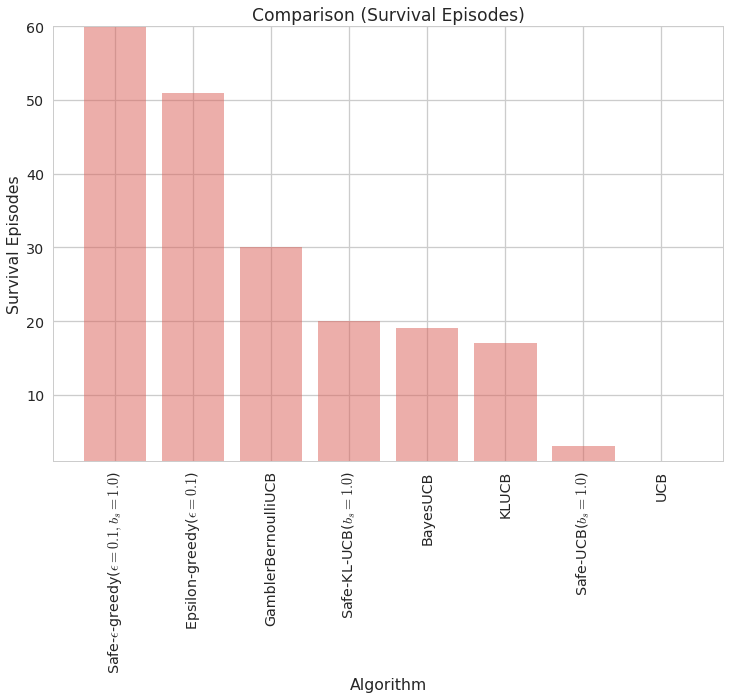

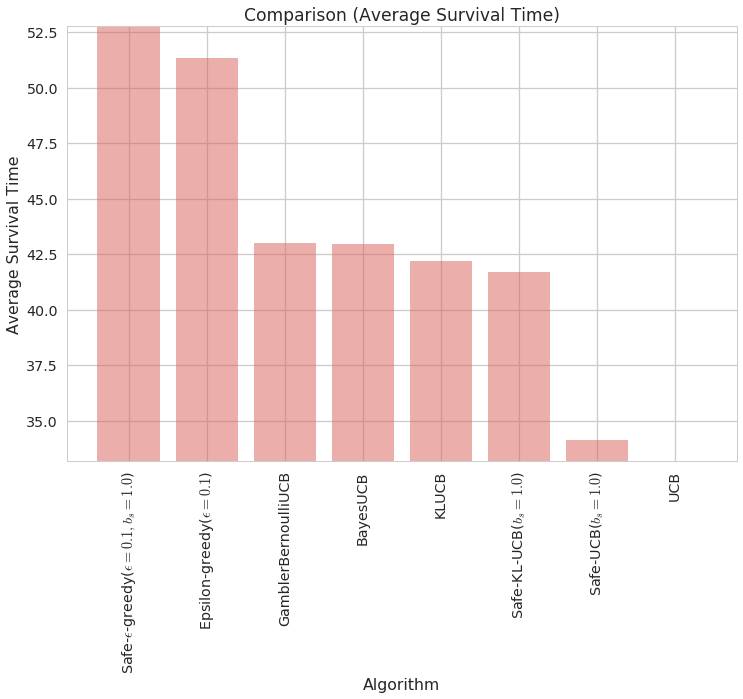

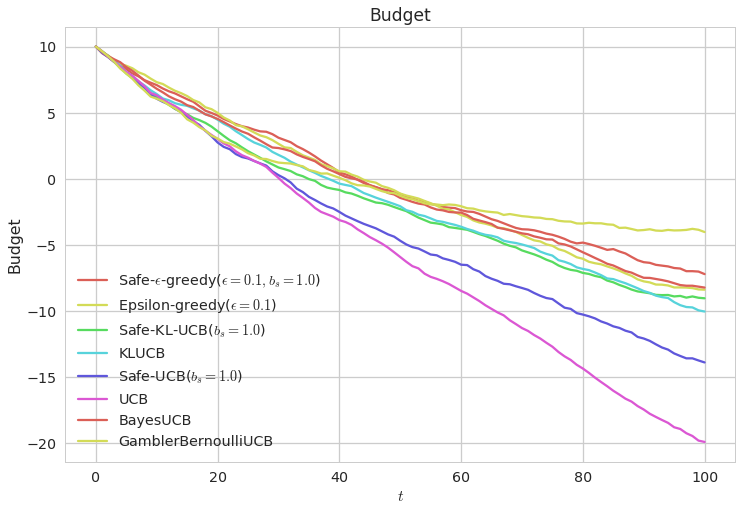

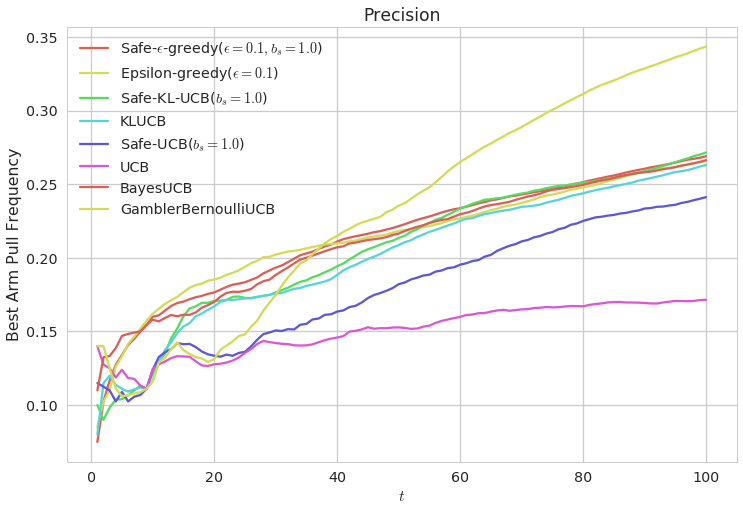

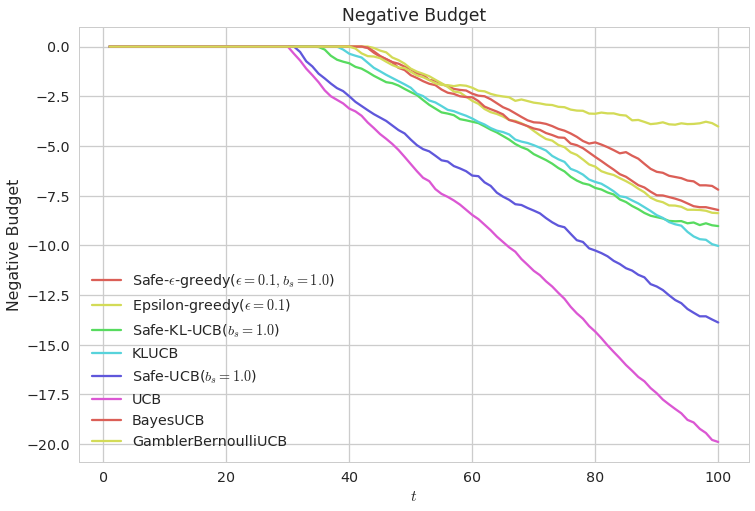

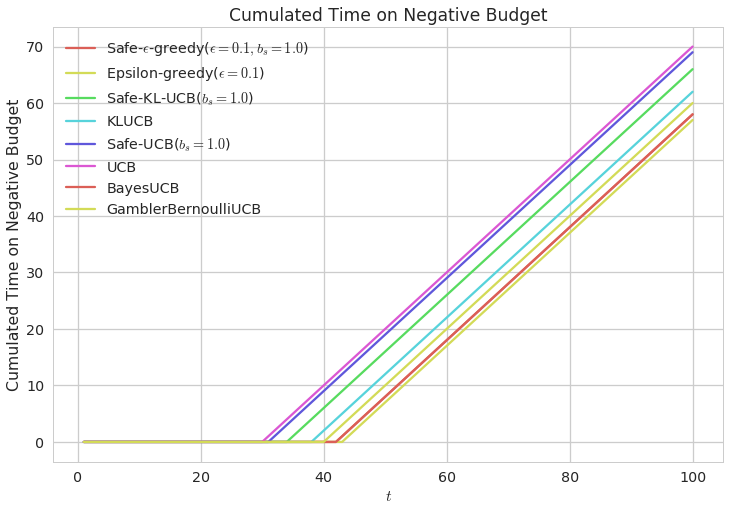

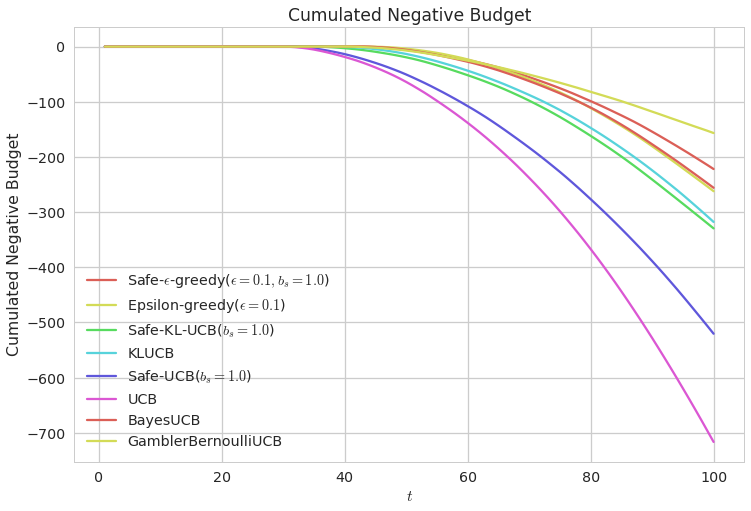

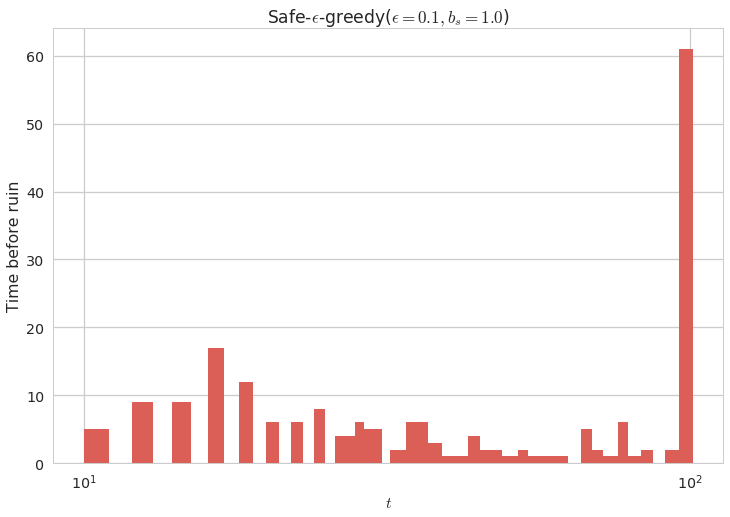

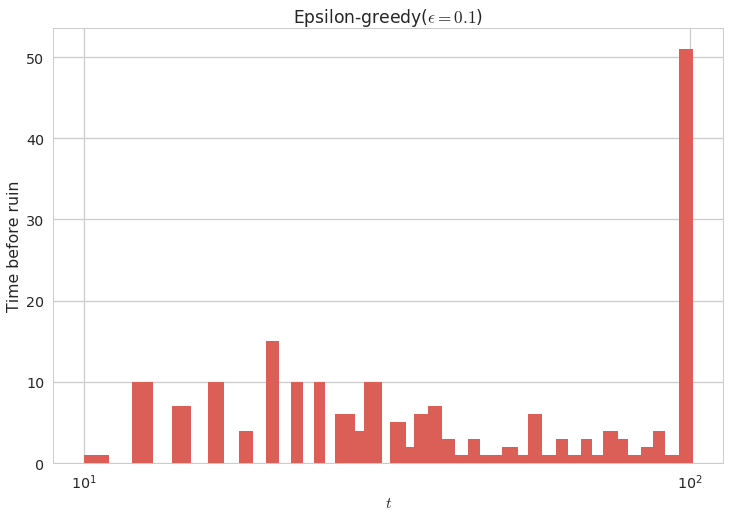

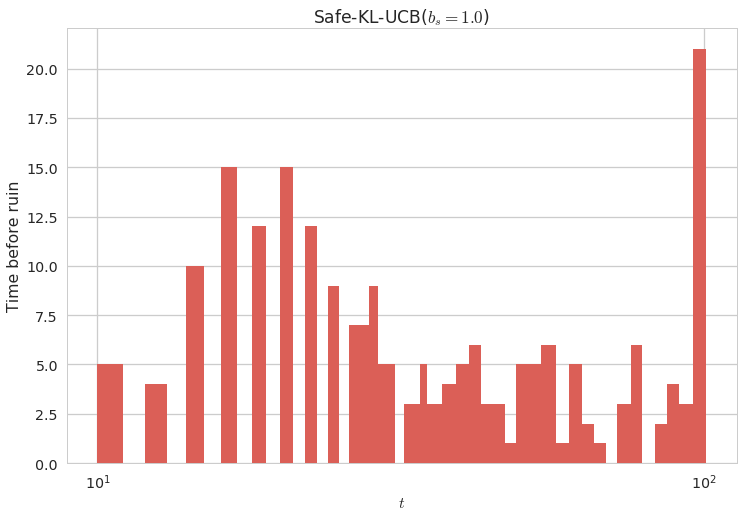

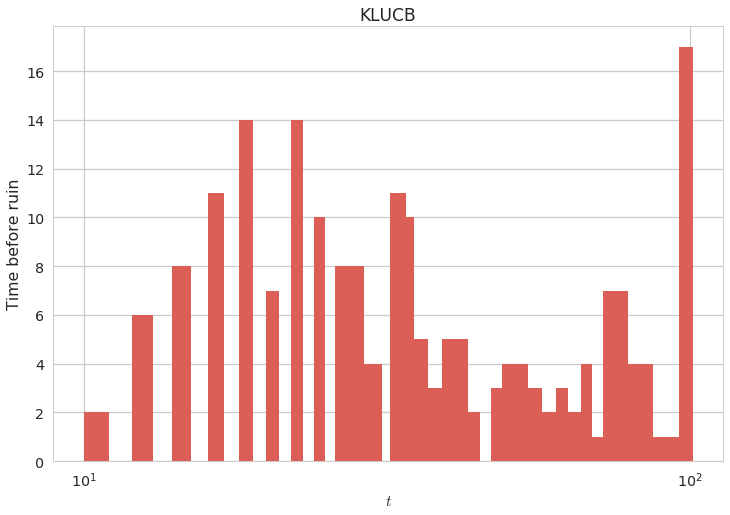

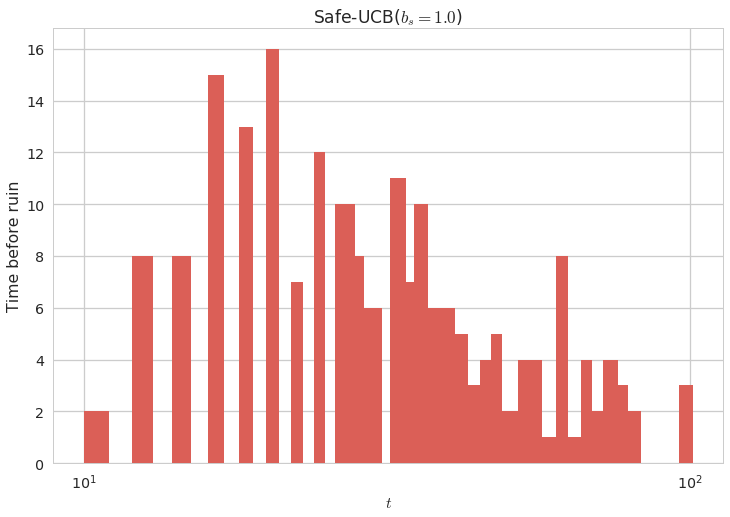

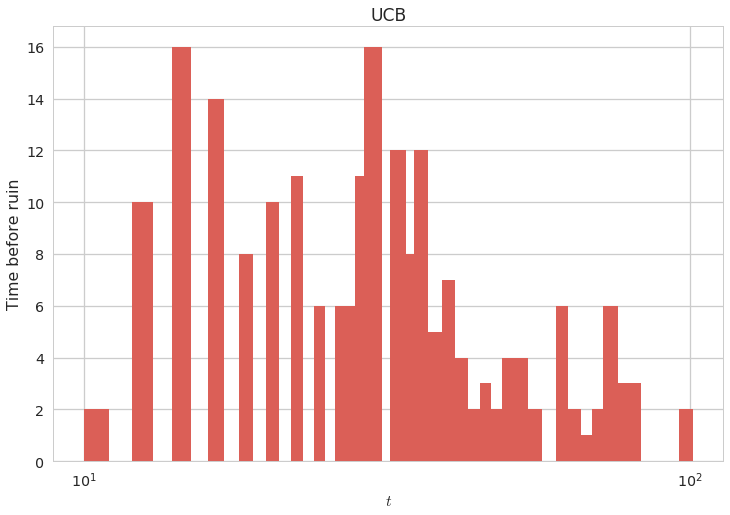

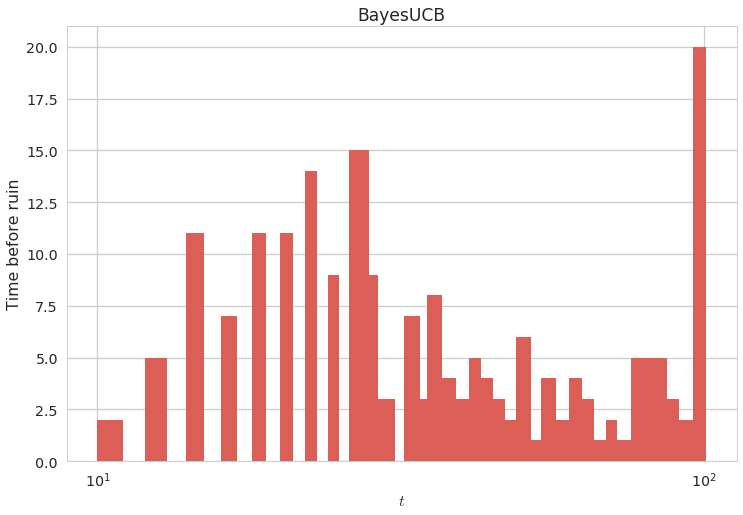

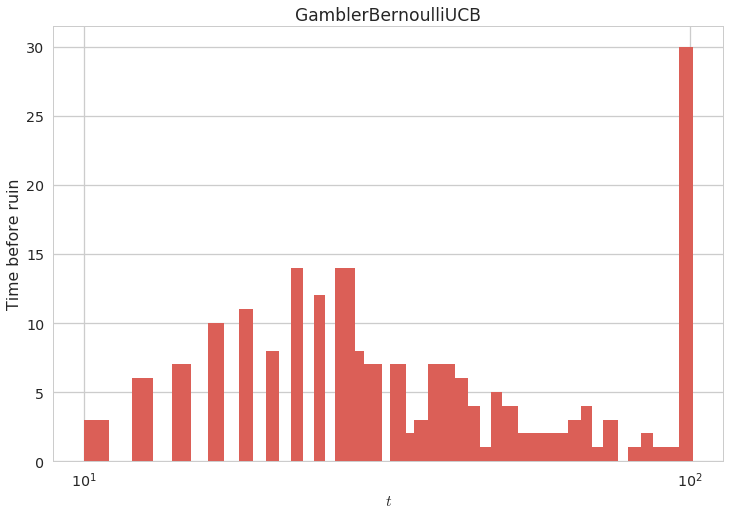

In [13]:
P = mabplt(M)

rate_names = [
    "Survival Episodes Rate", 
    "Survival Time (before ruin or end) (averaged over episodes)", 
    "Cumulative Time on Negative Budget (averaged over episodes)", 
    "Cumulative Negative Budget (averaged over episodes)"
    ]
#rate_algs = [str(g) for g in M.G]
rate_algs = ["PS-$\epsilon$-greedy", "$\epsilon$-greedy", "PS-KL-UCB", "KL-UCB", "PS-UCB", "UCB", "BayesUCB", "GB"]
rate_values = [1.0 - M.senb / M.n, M.MTTNB, M.mstnb, M.msnb]
df = pd.DataFrame(rate_values, rate_names, columns=rate_algs)
display(df)

P.plot_comp_algs_ruined_episodes()
#plt.xticks(np.arange(M.m, dtype='int'), rate_algs, rotation='horizontal')
#plt.savefig('surv_ep_t100.pdf')
#plt.show()

P.plot_comp_algs_survival_time()
#P.plot_comp_algs_cumulated_negative_budget()

P.plot_budget_progression()

P.plot_precision_progression()

P.plot_negative_budget_progression()

P.plot_negative_budget_time_progression()

P.plot_cumulated_negative_budget_progression()

for j, g in enumerate(M.G):
    P.plot_survival_histogram(j=j, title=str(g))

## Second Simulation

 - Few Repetitions 
 - Long Horizon

In [14]:
#time-horizon
tau = 15000 

#repetitions
n = 3

M2 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M2.run(tqdm_leave=True)

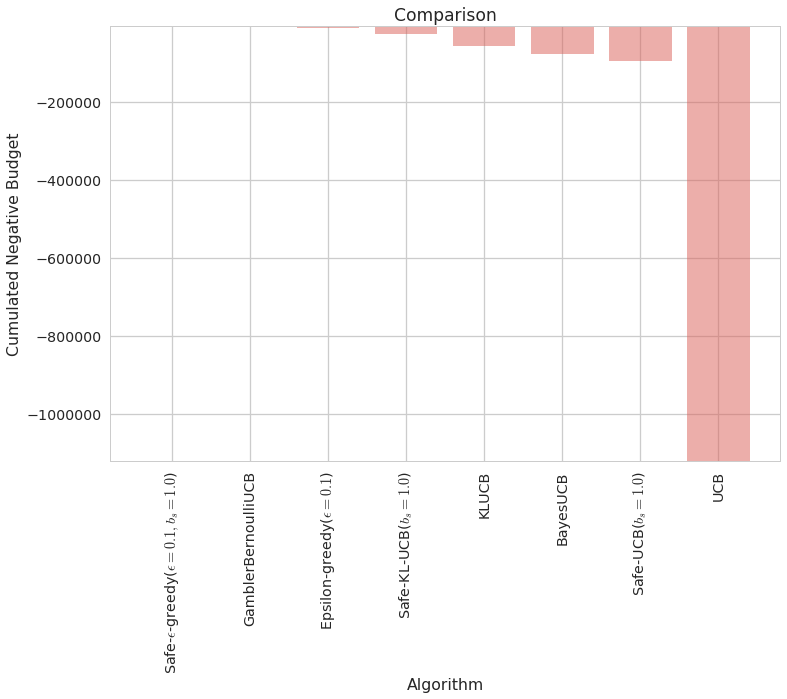

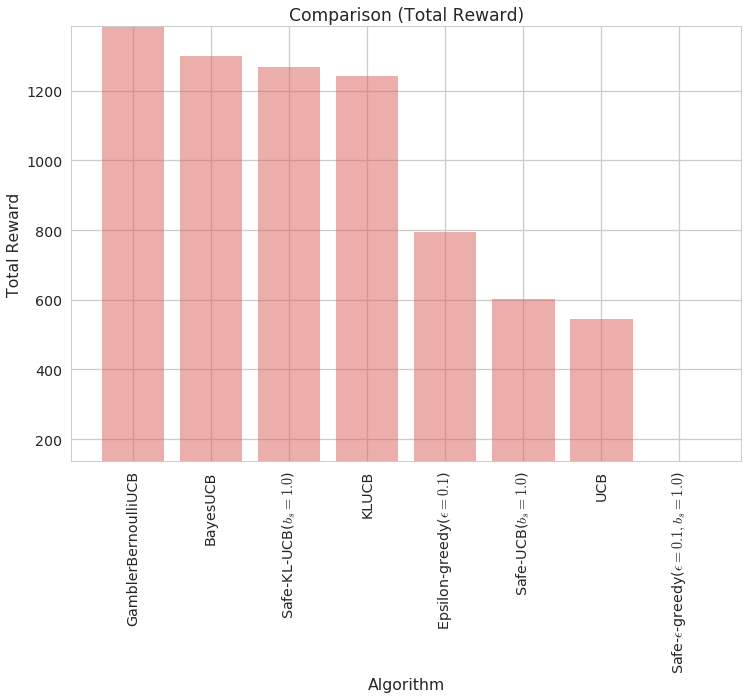

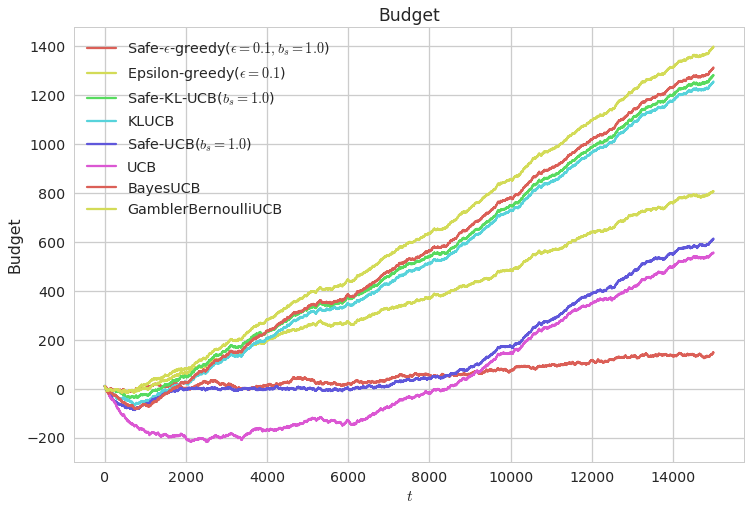

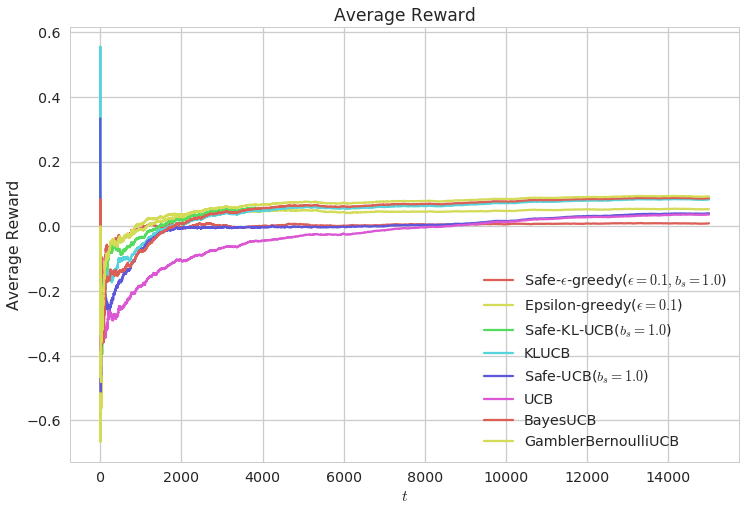

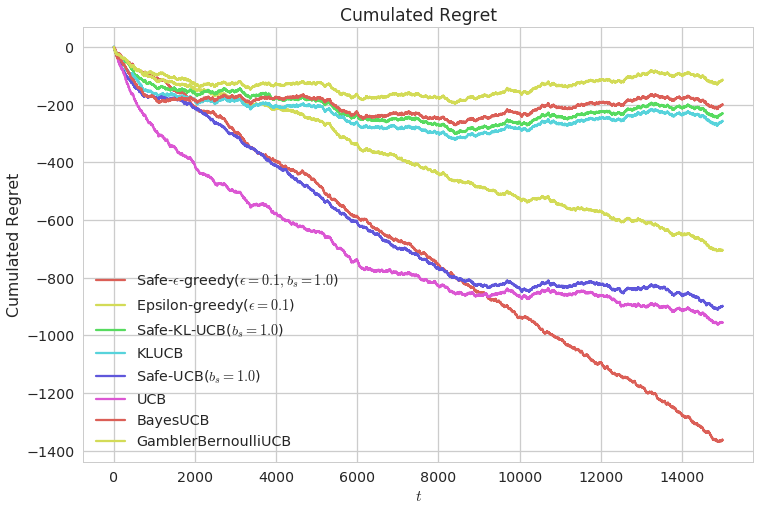

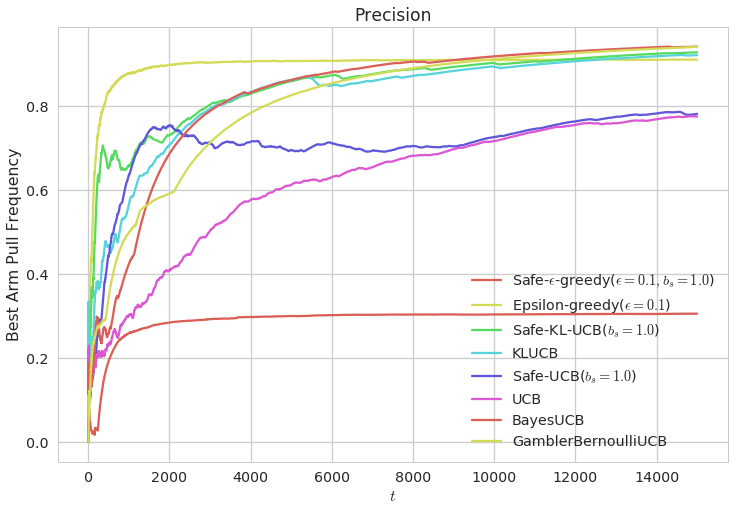

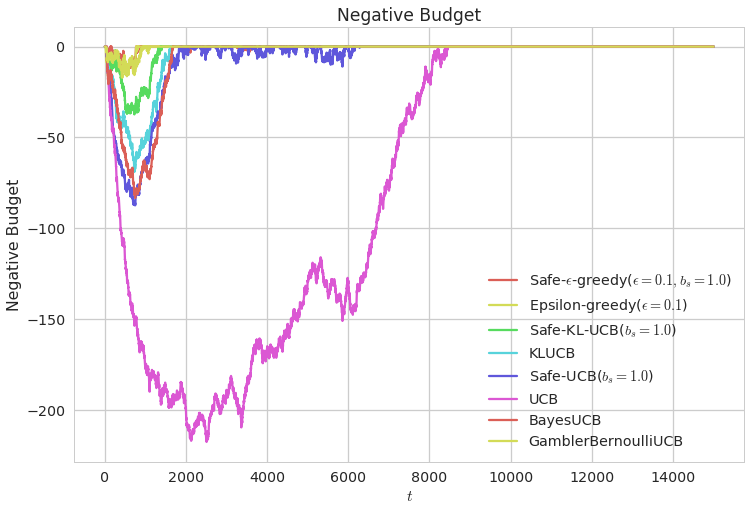

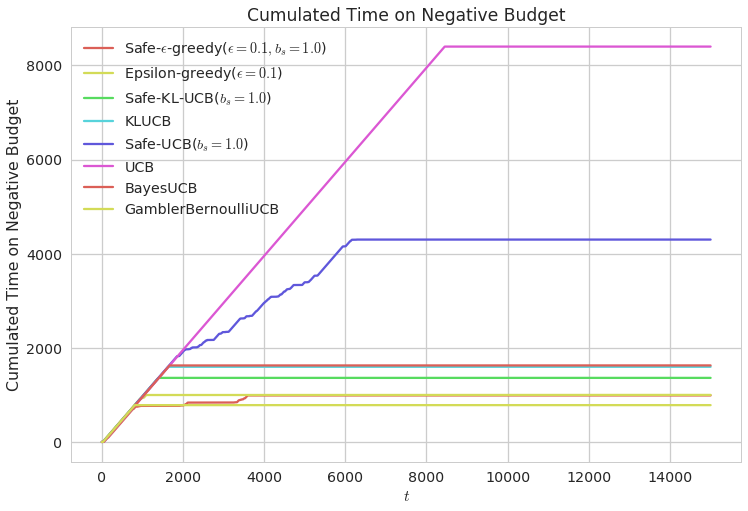

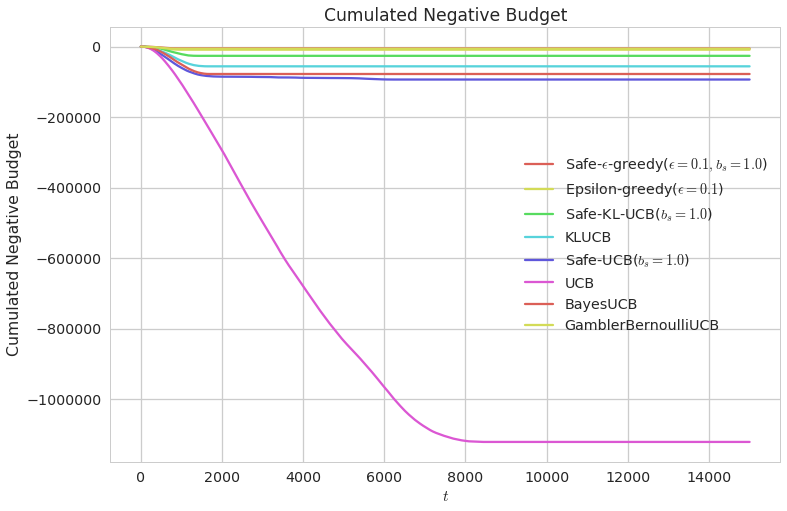

In [15]:
P = mabplt(M2)

P.plot_comp_algs_cumulated_negative_budget()
P.plot_comp_algs_total_rewards()

P.plot_budget_progression()
P.plot_average_reward_progression()

P.plot_cumulated_regret_progression()
#plt.savefig('regret_t15000.pdf')
plt.show()

P.plot_precision_progression()

P.plot_negative_budget_progression()
P.plot_negative_budget_time_progression()
P.plot_cumulated_negative_budget_progression()

## Load and Save

In [16]:
# Load the simulation back from the pickle file.
with open('mab.pickle', 'rb') as f:
M = pickle.load(f)

In [ ]:
# Save the simulation into a pickle file.
with open('mab.pickle', 'wb') as f:
    pickle.dump(M, f, pickle.HIGHEST_PROTOCOL)